In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d=pd.read_csv("titles.csv")
titles_df=pd.DataFrame(d)

In [3]:
titles_df

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008
...,...,...
244909,Black Butterfly in a Colorful World,2018
244910,Hua fei hua wu chun man cheng,1980
244911,Nippon dabi katsukyu,1970
244912,Under Siege 2: Dark Territory,1995


In [4]:
d=pd.read_csv("cast.csv")
cast_df=pd.DataFrame(d)

In [5]:
cast_df

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
...,...,...,...,...,...,...
3786171,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0
3786172,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0
3786173,Skammdegi,1985,Dalla ??r?ard?ttir,actress,Hj?krunarkona,9.0
3786174,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0


# 1.Using groupby(), plot the number of films that have been released each decade in the history of cinema.

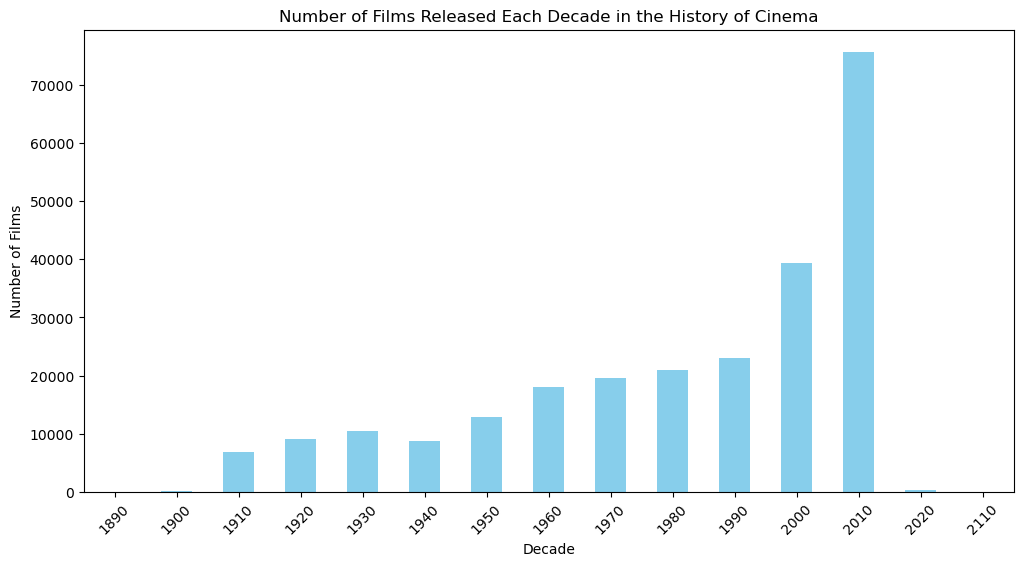

In [6]:
film_counts_per_decade = titles_df.groupby((titles_df['year'] // 10) * 10).size()

plt.figure(figsize=(12, 6))
film_counts_per_decade.plot(kind='bar', color='skyblue')
plt.title('Number of Films Released Each Decade in the History of Cinema')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.show()

# 2.Use groupby() to plot the number of "Hamlet" films made each decade.

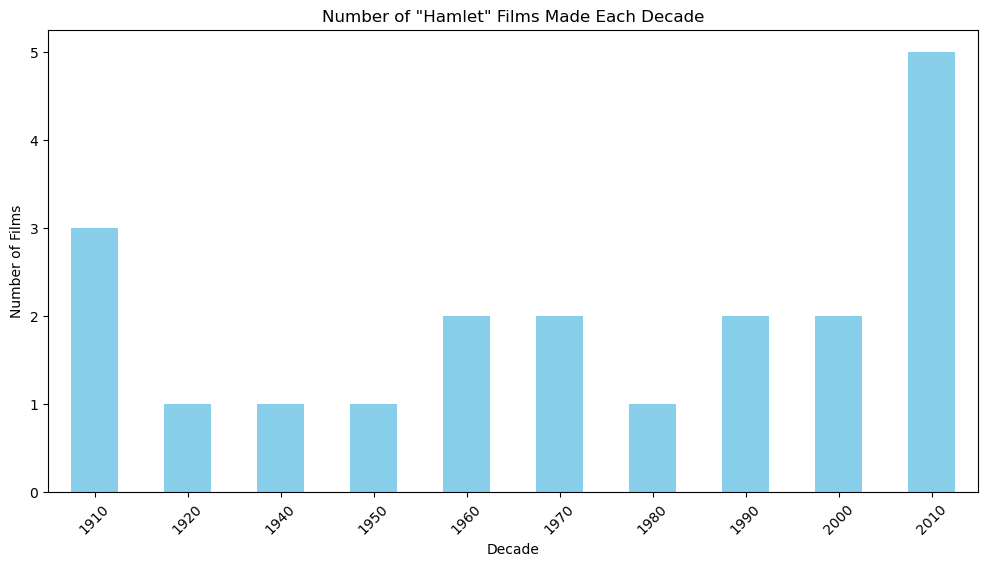

In [7]:
hamlet_df = titles_df[titles_df['title'] == "Hamlet"]

hamlet_counts_per_decade = hamlet_df.groupby((hamlet_df['year'] // 10) * 10).size()

plt.figure(figsize=(12, 6))
hamlet_counts_per_decade.plot(kind='bar', color='skyblue')
plt.title('Number of "Hamlet" Films Made Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.show()

# 3.How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?


In [8]:
roles_1950s = cast_df[(cast_df['year'] >= 1950) & (cast_df['year'] <= 1959)]

# Filter the dataset to include only leading roles (n=1)
leading_roles = roles_1950s[roles_1950s['n'] == 1]

# Group the leading roles by year and type (actor/actress) and count the number of roles in each group
leading_roles_by_year = leading_roles.groupby(['year', 'type']).size().unstack(fill_value=0)

# Display the result
print("Number of leading roles (n=1) by year and gender (actor/actress) in the 1950s:")
print(leading_roles_by_year)

Number of leading roles (n=1) by year and gender (actor/actress) in the 1950s:
type  actor  actress
year                
1950    625      288
1951    651      285
1952    613      304
1953    664      312
1954    636      316
1955    648      285
1956    668      307
1957    739      315
1958    715      301
1959    733      327


# 4.In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [9]:
roles_1950s = cast_df[(cast_df['year'] >= 1950) & (cast_df['year'] <= 1959)]

roles_n_1_to_5 = roles_1950s[(roles_1950s['n'] >= 1) & (roles_1950s['n'] <= 5)]

roles_by_n_and_type = roles_n_1_to_5.groupby(['n', 'type']).size().unstack(fill_value=0)

print("Number of roles (n=1 to 5) by type (actor/actress) in the 1950s:")
print(roles_by_n_and_type)

Number of roles (n=1 to 5) by type (actor/actress) in the 1950s:
type  actor  actress
n                   
1.0    6692     3040
2.0    4640     4635
3.0    5654     3201
4.0    5663     2881
5.0    5674     2592


# 5.Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [10]:
pink_panther_movies = cast_df[cast_df['title'].str.contains("Pink Panther", case=False)]

roles_per_pink_panther_movie = pink_panther_movies.groupby('title').size()

print("Number of roles listed for each of the Pink Panther movies:")
print(roles_per_pink_panther_movie)

Number of roles listed for each of the Pink Panther movies:
title
Curse of the Pink Panther          67
Revenge of the Pink Panther        68
Son of the Pink Panther            46
The Pink Panther                  111
The Pink Panther 2                 84
The Pink Panther Strikes Again     70
The Return of the Pink Panther     30
Trail of the Pink Panther          41
dtype: int64


# 6.List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [11]:
frank_oz_roles = cast_df[cast_df['name'] == "Frank Oz"]

roles_per_movie = frank_oz_roles.groupby(['title', 'year']).size().reset_index(name='role_count')

multiple_role_movies = roles_per_movie[roles_per_movie['role_count'] > 1]

multiple_role_movies_sorted = multiple_role_movies.sort_values(by='year')

print("Films in which Frank Oz played more than 1 role, sorted by year:")
print(multiple_role_movies_sorted[['title', 'year']])

Films in which Frank Oz played more than 1 role, sorted by year:
                                   title  year
24                      The Muppet Movie  1979
0         An American Werewolf in London  1981
22                The Great Muppet Caper  1981
20                      The Dark Crystal  1982
25            The Muppets Take Manhattan  1984
2                       Follow That Bird  1985
23            The Muppet Christmas Carol  1992
7                 Muppet Treasure Island  1996
8                     Muppets from Space  1999
18  The Adventures of Elmo in Grouchland  1999


# 7.List each of the characters that Frank Oz has portrayed at least twice.

In [12]:
frank_oz_roles = cast_df[cast_df['name'] == "Frank Oz"]

character_counts = frank_oz_roles['character'].value_counts()

characters_portrayed_at_least_twice = character_counts[character_counts >= 2]

print("Characters portrayed by Frank Oz at least twice:")
print(characters_portrayed_at_least_twice)

Characters portrayed by Frank Oz at least twice:
Miss Piggy        6
Yoda              6
Animal            6
Cookie Monster    5
Sam the Eagle     5
Fozzie Bear       4
Bert              3
Grover            2
Name: character, dtype: int64
